In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline


In [2]:
df = pd.read_csv("IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

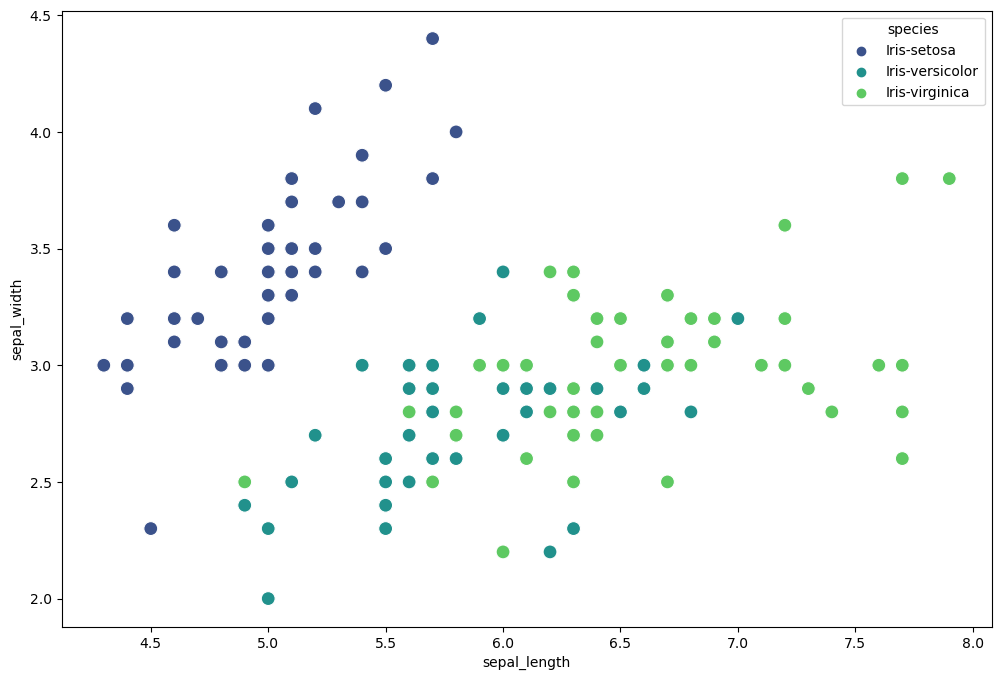

In [9]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.scatterplot(x ="sepal_length", y="sepal_width", hue="species", data=df , palette="viridis", s=100)

In [11]:
# 1- Pick a value for K.(key value)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [42]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [43]:
X=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width',]]

In [44]:
X[0:5]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [45]:
y=df["species"]

In [46]:
y[0:5]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [47]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#train/test split

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=101)

In [48]:
print("Train set:" , X_train.shape , y_train.shape)
print("test set: ", X_test.shape, y_test.shape)

Train set: (90, 4) (90,)
test set:  (60, 4) (60,)


In [49]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
6,4.6,3.4,1.4,0.3
51,6.4,3.2,4.5,1.5
118,7.7,2.6,6.9,2.3
136,6.3,3.4,5.6,2.4
84,5.4,3.0,4.5,1.5
...,...,...,...,...
63,6.1,2.9,4.7,1.4
70,5.9,3.2,4.8,1.8
81,5.5,2.4,3.7,1.0
11,4.8,3.4,1.6,0.2


In [50]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(X_train)


StandardScaler()

In [51]:
print(scaler.mean_)
print(scaler.var_)

[5.90444444 3.11111111 3.84666667 1.24888889]
[0.71198025 0.17987654 3.33448889 0.65560988]


In [52]:
X_train_norm=scaler.transform(X_train)
X_test_norm=scaler.transform(X_test)

In [54]:
column_list= X_train.columns
column_list

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [55]:
X_train_scaled= pd.DataFrame(data=X_train_norm, columns=column_list)
X_test_scaled= pd.DataFrame(data=X_train_norm, columns=column_list)

In [56]:
X_train_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-1.545936,0.681151,-1.339862,-1.171906
1,0.587298,0.209585,0.357783,0.310130
2,2.127967,-1.205114,1.672090,1.298153
3,0.468785,0.681151,0.960174,1.421656
4,-0.597832,-0.261981,0.357783,0.310130


C:\Users\90530\AppData\Local\Temp\ipykernel_161208\2901161727.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled["sepal_length"], color="green")
C:\Users\90530\AppData\Local\Temp\ipykernel_161208\2901161727.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train["sepal_length

<Axes: xlabel='sepal_length', ylabel='Density'>

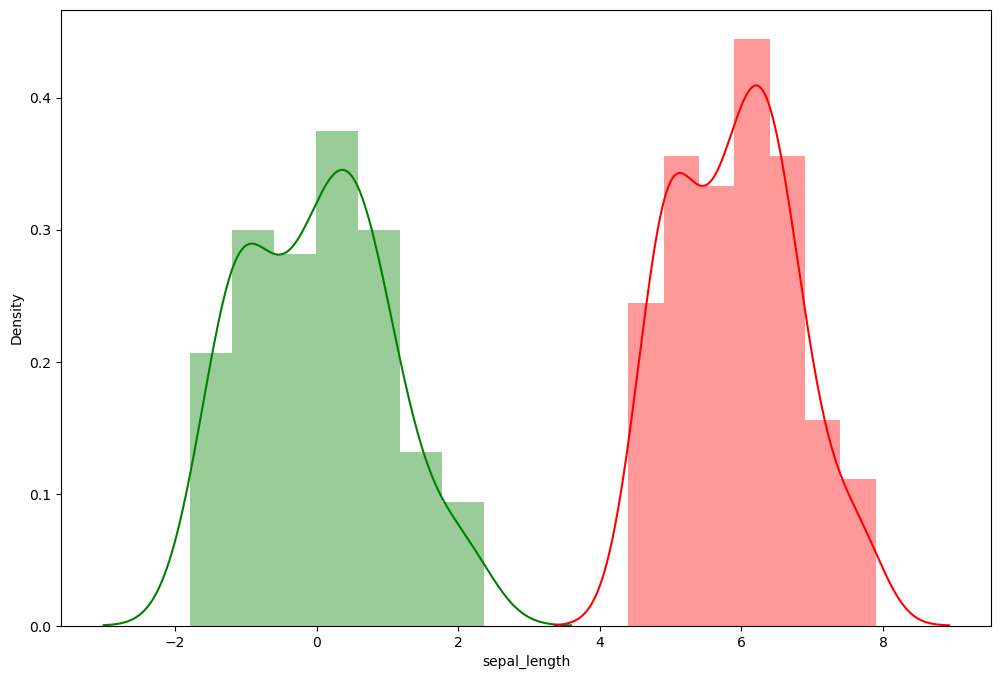

In [61]:
sns.distplot(X_train_scaled["sepal_length"], color="green")
sns.distplot(X_train["sepal_length"], color="red")

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
KNN= KNeighborsClassifier(n_neighbors = 1)

In [66]:
KNN.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=1)

In [68]:
# calculation of truth value
from sklearn.metrics import accuracy_score
y_pred = KNN.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.25
